In [1]:
#wczytanie niezbędnych bibliotek
import matplotlib.pyplot as plt
import math
import pandas as pd
import numpy as np
import catboost
from numpy import random
import warnings
warnings.filterwarnings('ignore')

In [2]:
#wczytanie zbudowanego modelu
model = catboost.CatBoostClassifier()
model.load_model('./model.cbm')

CatBoostError: C:/Go_Agent/pipelines/BuildMaster/catboost.git/catboost/libs/model/model_import_interface.h:19: Model file doesn't exist: ./model.cbm

In [5]:
#wczytanie początkowych (niezaburzonych) danych
data_train = pd.read_csv('./train_kaggle_raw.csv')
data_test = pd.read_csv('./test_kaggle_raw.csv')
X_train = data_train.drop('TARGET', axis=1)
y_train = data_train['TARGET']
X_test = data_test.drop('TARGET', axis=1)
y_test = data_test['TARGET']

In [ ]:
%%time
#pierwsze dopasowanie modelu dla początkowych danych
model.fit(X_train, y_train)
model_pred_prob = pd.DataFrame({"start": model.predict_proba(X_test)[:,0]})

#wybranie ciągłych zmiennych do zaburzania
indexes = [0,1,2,3,4,5,11,12,13,17,19,20,21,23]

#pętla narzucająca szum na dane wejściowe, trenująca na nich model i tworząca macierz z prawdopodobieństwem należności do klasy 1 dla każdej obserwacji
for j in range(10):
    i=0
    for name in list(X_train.columns):
        modified_column = X_train[name]+ np.random.normal(loc = X_train.mean()[i], scale = abs(X_train.mean()[i])*10, size = X_train[name].shape)
        if i==0:
            df = pd.DataFrame({name: modified_column})
        elif i in indexes:
            df.insert(i, name, modified_column)
        else:
            df.insert(i, name, X_train[name])
        i=i+1
    model.fit(df, y_train)
    model_pred_prob.insert(j, j, model.predict_proba(X_test)[:,0])

0:	learn: 0.5164127	total: 247ms	remaining: 2m 1s
1:	learn: 0.4188476	total: 316ms	remaining: 1m 17s
2:	learn: 0.3604696	total: 367ms	remaining: 1m
3:	learn: 0.3275090	total: 412ms	remaining: 50.5s
4:	learn: 0.3077009	total: 457ms	remaining: 44.7s
5:	learn: 0.2945325	total: 513ms	remaining: 41.7s
6:	learn: 0.2870176	total: 556ms	remaining: 38.6s
7:	learn: 0.2790097	total: 632ms	remaining: 38.4s
8:	learn: 0.2728782	total: 717ms	remaining: 38.6s
9:	learn: 0.2694979	total: 830ms	remaining: 40.2s
10:	learn: 0.2685772	total: 901ms	remaining: 39.5s
11:	learn: 0.2655014	total: 1.01s	remaining: 40.8s
12:	learn: 0.2649168	total: 1.07s	remaining: 39.6s
13:	learn: 0.2623325	total: 1.18s	remaining: 40.4s
14:	learn: 0.2614106	total: 1.25s	remaining: 39.8s
15:	learn: 0.2594583	total: 1.3s	remaining: 39s
16:	learn: 0.2594317	total: 1.35s	remaining: 37.9s
17:	learn: 0.2594143	total: 1.39s	remaining: 36.8s
18:	learn: 0.2586376	total: 1.45s	remaining: 36.3s
19:	learn: 0.2580374	total: 1.52s	remaining: 3

163:	learn: 0.2412666	total: 11.2s	remaining: 22.6s
164:	learn: 0.2412521	total: 11.3s	remaining: 22.6s
165:	learn: 0.2412422	total: 11.4s	remaining: 22.5s
166:	learn: 0.2411300	total: 11.5s	remaining: 22.5s
167:	learn: 0.2409967	total: 11.6s	remaining: 22.5s
168:	learn: 0.2409531	total: 11.7s	remaining: 22.4s
169:	learn: 0.2409073	total: 11.8s	remaining: 22.4s
170:	learn: 0.2409073	total: 11.8s	remaining: 22.3s
171:	learn: 0.2409073	total: 11.8s	remaining: 22.1s
172:	learn: 0.2409032	total: 11.9s	remaining: 22s
173:	learn: 0.2409025	total: 11.9s	remaining: 21.9s
174:	learn: 0.2409018	total: 12s	remaining: 21.8s
175:	learn: 0.2408353	total: 12.1s	remaining: 21.8s
176:	learn: 0.2408353	total: 12.1s	remaining: 21.7s
177:	learn: 0.2407895	total: 12.2s	remaining: 21.6s
178:	learn: 0.2406785	total: 12.3s	remaining: 21.6s
179:	learn: 0.2405804	total: 12.4s	remaining: 21.6s
180:	learn: 0.2405772	total: 12.4s	remaining: 21.5s
181:	learn: 0.2404611	total: 12.6s	remaining: 21.5s
182:	learn: 0.24

323:	learn: 0.2368713	total: 22s	remaining: 11.5s
324:	learn: 0.2368072	total: 22.1s	remaining: 11.5s
325:	learn: 0.2368067	total: 22.1s	remaining: 11.4s
326:	learn: 0.2367968	total: 22.2s	remaining: 11.3s
327:	learn: 0.2367620	total: 22.3s	remaining: 11.3s
328:	learn: 0.2367034	total: 22.4s	remaining: 11.2s
329:	learn: 0.2367034	total: 22.4s	remaining: 11.1s
330:	learn: 0.2366650	total: 22.5s	remaining: 11.1s
331:	learn: 0.2366650	total: 22.5s	remaining: 11s
332:	learn: 0.2366442	total: 22.6s	remaining: 10.9s
333:	learn: 0.2365757	total: 22.7s	remaining: 10.9s
334:	learn: 0.2365710	total: 22.8s	remaining: 10.8s
335:	learn: 0.2365560	total: 22.8s	remaining: 10.7s
336:	learn: 0.2365425	total: 22.9s	remaining: 10.7s
337:	learn: 0.2365262	total: 23s	remaining: 10.6s
338:	learn: 0.2365262	total: 23s	remaining: 10.5s
339:	learn: 0.2364777	total: 23.2s	remaining: 10.5s
340:	learn: 0.2364668	total: 23.2s	remaining: 10.4s
341:	learn: 0.2364157	total: 23.3s	remaining: 10.4s
342:	learn: 0.236385

484:	learn: 0.2335627	total: 33.4s	remaining: 619ms
485:	learn: 0.2335585	total: 33.4s	remaining: 550ms
486:	learn: 0.2334972	total: 33.5s	remaining: 482ms
487:	learn: 0.2334957	total: 33.6s	remaining: 413ms
488:	learn: 0.2334570	total: 33.7s	remaining: 345ms
489:	learn: 0.2334559	total: 33.8s	remaining: 276ms
490:	learn: 0.2334342	total: 33.9s	remaining: 207ms
491:	learn: 0.2333771	total: 33.9s	remaining: 138ms
492:	learn: 0.2333470	total: 34.1s	remaining: 69.1ms
493:	learn: 0.2333465	total: 34.1s	remaining: 0us
0:	learn: 0.5242135	total: 98.7ms	remaining: 48.7s
1:	learn: 0.4252596	total: 168ms	remaining: 41.3s
2:	learn: 0.3656022	total: 234ms	remaining: 38.3s
3:	learn: 0.3319256	total: 289ms	remaining: 35.4s
4:	learn: 0.3104441	total: 346ms	remaining: 33.9s
5:	learn: 0.2982880	total: 393ms	remaining: 31.9s
6:	learn: 0.2907467	total: 440ms	remaining: 30.6s
7:	learn: 0.2853819	total: 526ms	remaining: 32s
8:	learn: 0.2824169	total: 607ms	remaining: 32.7s
9:	learn: 0.2805700	total: 707ms

152:	learn: 0.2591070	total: 11.5s	remaining: 25.7s
153:	learn: 0.2591070	total: 11.6s	remaining: 25.6s
154:	learn: 0.2591070	total: 11.6s	remaining: 25.4s
155:	learn: 0.2590525	total: 11.7s	remaining: 25.4s
156:	learn: 0.2590442	total: 11.8s	remaining: 25.3s
157:	learn: 0.2590442	total: 11.8s	remaining: 25.2s
158:	learn: 0.2589863	total: 11.9s	remaining: 25.2s
159:	learn: 0.2589249	total: 12.1s	remaining: 25.2s
160:	learn: 0.2589245	total: 12.1s	remaining: 25.1s
161:	learn: 0.2589093	total: 12.2s	remaining: 25s
162:	learn: 0.2588601	total: 12.3s	remaining: 25s
163:	learn: 0.2588143	total: 12.4s	remaining: 25s
164:	learn: 0.2587440	total: 12.5s	remaining: 25s
165:	learn: 0.2587438	total: 12.6s	remaining: 24.9s
166:	learn: 0.2587084	total: 12.7s	remaining: 24.8s
167:	learn: 0.2587084	total: 12.7s	remaining: 24.7s
168:	learn: 0.2587084	total: 12.8s	remaining: 24.5s
169:	learn: 0.2587080	total: 12.8s	remaining: 24.4s
170:	learn: 0.2587074	total: 12.8s	remaining: 24.3s
171:	learn: 0.258707

313:	learn: 0.2551208	total: 23.9s	remaining: 13.7s
314:	learn: 0.2551080	total: 24s	remaining: 13.6s
315:	learn: 0.2551080	total: 24s	remaining: 13.5s
316:	learn: 0.2550561	total: 24.1s	remaining: 13.5s
317:	learn: 0.2550561	total: 24.2s	remaining: 13.4s
318:	learn: 0.2550377	total: 24.3s	remaining: 13.3s
319:	learn: 0.2549560	total: 24.4s	remaining: 13.3s
320:	learn: 0.2549529	total: 24.4s	remaining: 13.2s
321:	learn: 0.2549391	total: 24.6s	remaining: 13.1s
322:	learn: 0.2549236	total: 24.6s	remaining: 13s
323:	learn: 0.2548961	total: 24.7s	remaining: 13s
324:	learn: 0.2548961	total: 24.7s	remaining: 12.9s
325:	learn: 0.2548485	total: 24.9s	remaining: 12.8s
326:	learn: 0.2548484	total: 24.9s	remaining: 12.7s
327:	learn: 0.2548096	total: 25s	remaining: 12.7s
328:	learn: 0.2547963	total: 25.1s	remaining: 12.6s
329:	learn: 0.2547819	total: 25.2s	remaining: 12.5s
330:	learn: 0.2547348	total: 25.3s	remaining: 12.5s
331:	learn: 0.2547296	total: 25.4s	remaining: 12.4s
332:	learn: 0.2546953	

In [11]:
#transpozycja macierzy i wyciągnięcie wariancji oraz średniej każdej kolumny (każdej obserwacji)
model_pred_prob_transposed = model_pred_prob.T
variations = model_pred_prob_transposed.var()
scores = model_pred_prob_transposed.mean()

In [7]:
#stworzenie przedziałów ufności dla każdej z obserwacji
n = len(X_train)
alpha = 0.01
qhat = np.quantile(conformity_scores, np.ceil((n+1)*(1-alpha))/n)
#x = np.unique(X_test)
#x_odds = x/(1-x)
output = np.array([scores-qhat*variations,scores+qhat*variations])

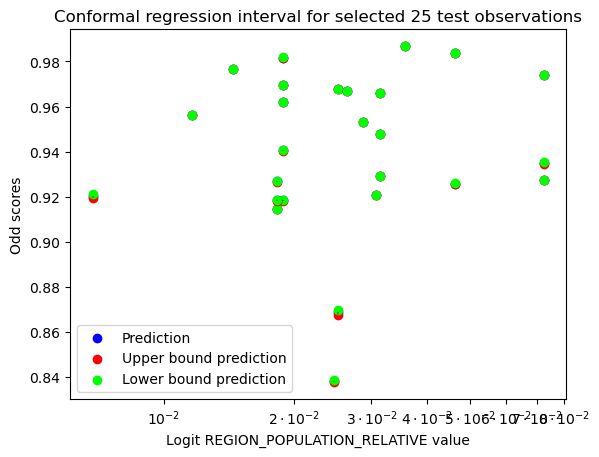

In [13]:
#wizualizacja przedziałów
indices_2 = X_test.index
k = 25
variable = 'REGION_POPULATION_RELATIVE'
for i in range(k):
    obs_num = random.randint(0,len(X_test)-1)
    plt.scatter(X_test[variable][indices_2[obs_num]],scores[indices_2[obs_num]], color = 'blue')
    plt.scatter(X_test[variable][indices_2[obs_num]],output[0, obs_num], color = 'r')
    plt.scatter(X_test[variable][indices_2[obs_num]],output[1, obs_num],  color = 'lime')
    plt.plot((X_test[variable][indices_2[obs_num]], X_test[variable][indices_2[obs_num]]), (output[0, obs_num], scores[indices_2[obs_num]]), color = 'r', linestyle = '--', alpha = 0.5)
    plt.plot((X_test[variable][indices_2[obs_num]], X_test[variable][indices_2[obs_num]]), (scores[indices_2[obs_num]], output[1, obs_num]), color = 'lime', linestyle = '--', alpha = 0.5)
obs_num = random.randint(0,len(X_test)-1)

plt.scatter(X_test[variable][indices_2[obs_num]],scores[indices_2[obs_num]], color = 'blue',label = 'Prediction')
plt.scatter(X_test[variable][indices_2[obs_num]],output[0, obs_num], label = 'Upper bound prediction', color = 'r')
plt.scatter(X_test[variable][indices_2[obs_num]],output[1, obs_num], label = 'Lower bound prediction', color = 'lime')
plt.plot((X_test[variable][indices_2[obs_num]], X_test[variable][indices_2[obs_num]]), (output[0, obs_num], scores[indices_2[obs_num]]), color = 'r', linestyle = '--', alpha = 0.5)
plt.plot((X_test[variable][indices_2[obs_num]], X_test[variable][indices_2[obs_num]]), (scores[indices_2[obs_num]], output[1, obs_num]), color = 'lime', linestyle = '--', alpha = 0.5)

plt.legend()
plt.xlabel(f'Logit {variable} value')
plt.ylabel('Odd scores')
#plt.yscale('logit')
plt.xscale('logit')
plt.title(f'Conformal regression interval for selected {k} test observations')
plt.show()